# train the model and test 

In [1]:
import os
import torch
import random
import numpy as np
from DeepCNN import DeepCNN,setup_seed
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm as tqdm

import done!


In [2]:
# set random seed
setup_seed(2023)

In [3]:
lr = 0.001
batch_size = 64

In [4]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
model = DeepCNN(n_cells=2)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

## data procession

In [5]:
from train import load_data
dataset = load_data('data/negatives.fa','data/positives.fa',demo=True)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

  0%|          | 0/20000 [00:00<?, ?it/s]

In [6]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,num_workers=10,pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,num_workers=10,pin_memory=True)
len(train_loader),len(test_loader)

(250, 63)

## train and test

  0%|          | 0/5 [00:00<?, ?it/s]

Train Loss: 0.5548, Acc: 0.7076, Precision: 0.7939, Recall: 0.7076, F1: 0.6901, AUC: 0.7178
Test Loss: 0.5611, Acc: 0.6585, Precision: 0.7635, Recall: 0.6585, F1: 0.6273, AUC: 0.6672
Train Loss: 0.5515, Acc: 0.7026, Precision: 0.7824, Recall: 0.7026, F1: 0.6868, AUC: 0.7135
Test Loss: 0.5491, Acc: 0.7242, Precision: 0.8247, Recall: 0.7242, F1: 0.6976, AUC: 0.7157
Train Loss: 0.5494, Acc: 0.7113, Precision: 0.7919, Recall: 0.7113, F1: 0.6957, AUC: 0.7213
Test Loss: 0.5548, Acc: 0.7242, Precision: 0.8247, Recall: 0.7242, F1: 0.6976, AUC: 0.7157
Train Loss: 0.5495, Acc: 0.7057, Precision: 0.7895, Recall: 0.7057, F1: 0.6894, AUC: 0.7180
Test Loss: 0.5501, Acc: 0.7245, Precision: 0.8248, Recall: 0.7245, F1: 0.6979, AUC: 0.7159
Train Loss: 0.5491, Acc: 0.7065, Precision: 0.7865, Recall: 0.7065, F1: 0.6921, AUC: 0.7194
Test Loss: 0.5478, Acc: 0.7250, Precision: 0.8251, Recall: 0.7250, F1: 0.6985, AUC: 0.7165


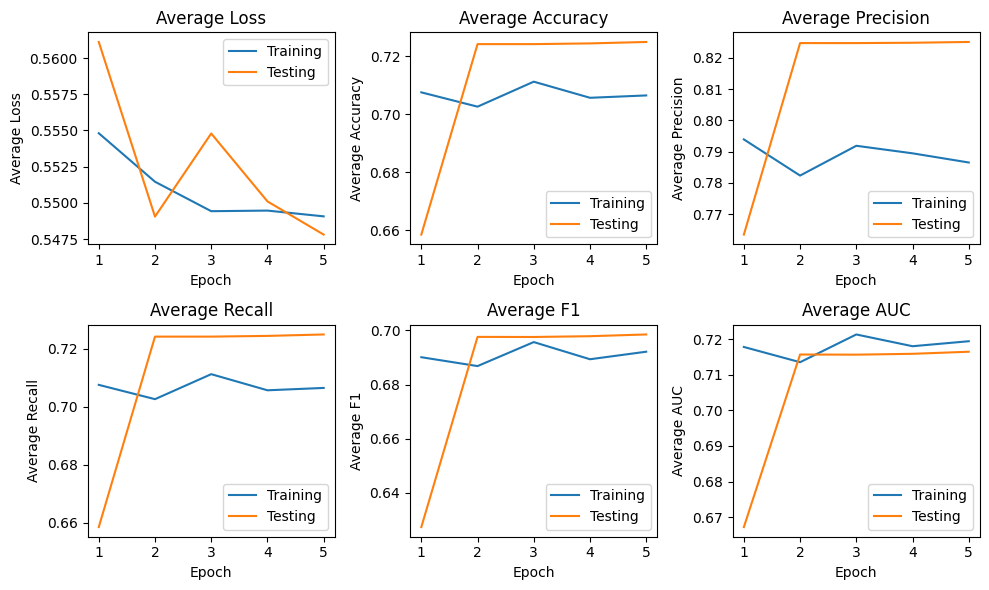

In [7]:
import matplotlib.pyplot as plt
from train import train
from train import test
from train import plot_res

# Training loop
num_epochs = 5
train_res = []
test_res = []
for epoch in tqdm(range(num_epochs)):
    train_res.append(train(model, train_loader, optimizer, criterion, device))
    test_res.append(test(model, test_loader, criterion, device))
plot_res(train_res,test_res,num_epochs)

In [8]:
#torch.save(model, 'epoch5_20230419.pth')